In [4]:
import pandas as pd
# Load the CSV file
data = pd.read_csv('/content/processed_dataset_2.0.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - loss: 2203.5515 - val_loss: 5675.9482
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2213.2478 - val_loss: 5671.5923
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2165.2842 - val_loss: 5667.0391
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2180.4395 - val_loss: 5662.2935
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2166.5725 - val_loss: 5657.5347
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2110.2993 - val_loss: 5652.6738
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2118.5330 - val_loss: 5647.7344
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2188.0867 - val_loss: 5642.6328
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2163.6555 - val_loss: 5637.4170
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2197.2197 - val_loss: 5632.0601
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2139.5005 - val_loss: 5626.4990
Epoch 12/100
2/2 ━━

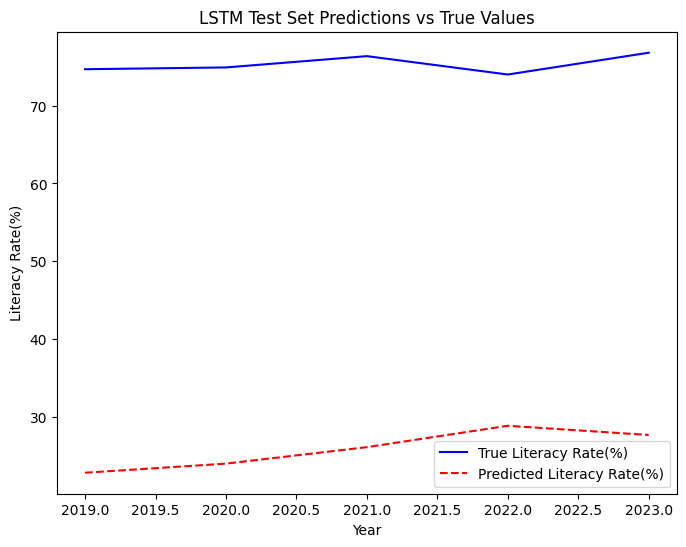

Test Mean Squared Error (MSE): 2450.56
Test Mean Absolute Error (MAE): 49.45
Test R-squared (R2 Score): -2191.85
Training Duration: 9.400117158889770508 seconds


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

# Load dataset
df = data

# Define your target and features
X = df.drop(columns=['Literacy Rate(%)', 'Year'])
y = df['Literacy Rate(%)']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the scaler
y_scaler = MinMaxScaler()

# Reshape y to 2D array and scale
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))
# Define split point
split_index = int(0.9 * len(df))

# Reshape input for LSTM [samples, time steps, features]
X_train = X_scaled[:split_index].reshape(-1, 1, X.shape[1])
X_test = X_scaled[split_index:].reshape(-1, 1, X.shape[1])
y_train = y[:split_index].values
y_test = y[split_index:].values

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
end_time = time.time()
duration = end_time - start_time

# Predict on test data
y_pred_test = model.predict(X_test).flatten()

# Plot predictions vs true values for the test set
plt.figure(figsize=(8, 6))
plt.plot(df['Year'][split_index:], y_test, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Predicted Literacy Rate(%)', color='red', linestyle='--')
plt.title('LSTM Test Set Predictions vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

# Display model performance metrics for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f"Training Duration: {duration:.18f} seconds")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


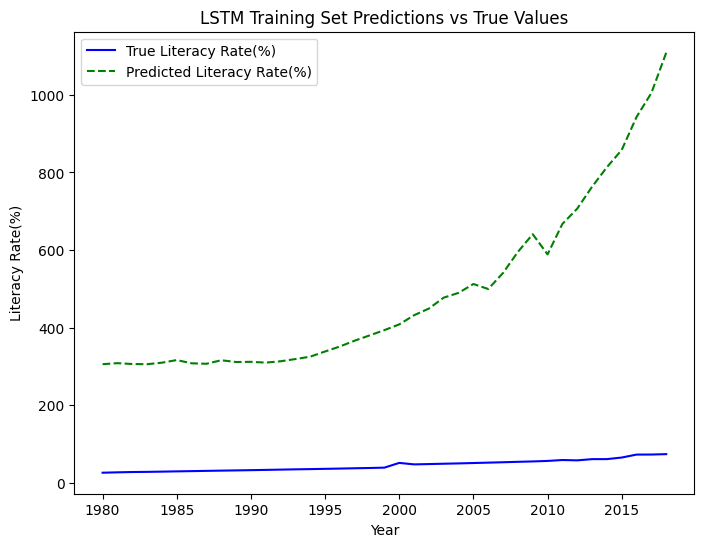

In [9]:
y_pred_train = y_scaler.inverse_transform(model.predict(X_train).flatten().reshape(-1, 1)).flatten()

# Plot predictions vs true values for the training set
plt.figure(figsize=(8, 6))
plt.plot(df['Year'][:split_index], y_train, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][:split_index], y_pred_train, label='Predicted Literacy Rate(%)', color='green', linestyle='--')
plt.title('LSTM Training Set Predictions vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 384ms/step - loss: 0.1411 - val_loss: 0.8547
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1322 - val_loss: 0.8379
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1377 - val_loss: 0.8225
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1304 - val_loss: 0.8069
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1299 - val_loss: 0.7903
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1255 - val_loss: 0.7728
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1200 - val_loss: 0.7536
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1140 - val_loss: 0.7319
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1114 - val_loss: 0.7076
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1058 - val_loss: 0.6809
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0996 - val_loss: 0.6508
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0957 - val_loss: 0.6175


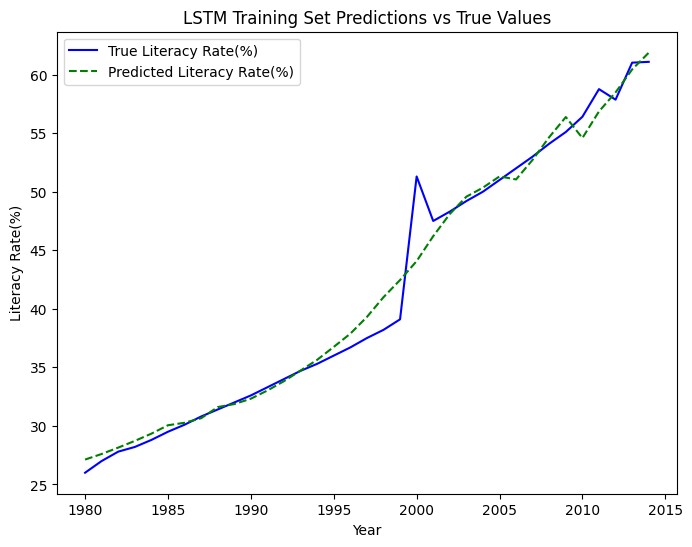

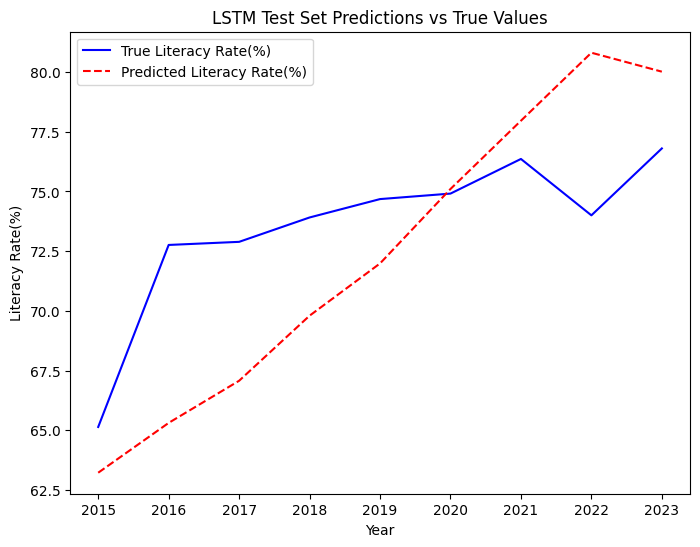

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time

# Define your target and features
X = df.drop(columns=['Literacy Rate(%)', 'Year'])  # Features excluding target and Year
y = df['Literacy Rate(%)']  # Target

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Scale the target values
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Define split index
split_index = int(0.8 * len(df))  # 90% training, 10% testing

# Reshape data for LSTM input: [samples, time steps, features]
X_train = X_scaled[:split_index].reshape(-1, 1, X.shape[1])
X_test = X_scaled[split_index:].reshape(-1, 1, X.shape[1])
y_train = y_scaled[:split_index]
y_test = y_scaled[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')



# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test), verbose=1)
end_time = time.time()
duration = end_time - start_time

# Predict on test and training data
y_pred_test = y_scaler.inverse_transform(model.predict(X_test).flatten().reshape(-1, 1)).flatten()
y_pred_train = y_scaler.inverse_transform(model.predict(X_train).flatten().reshape(-1, 1)).flatten()

y_pred_test = np.minimum(y_pred_test, 100)

# Inverse transform true target values
y_train = y_scaler.inverse_transform(y_train).flatten()
y_test = y_scaler.inverse_transform(y_test).flatten()

# Performance metrics for test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f"Training Duration: {duration:.18f} seconds")

# Plot predictions vs true values for the training set
plt.figure(figsize=(8, 6))
plt.plot(df['Year'][:split_index], y_train, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][:split_index], y_pred_train, label='Predicted Literacy Rate(%)', color='green', linestyle='--')
plt.title('LSTM Training Set Predictions vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

# Plot predictions vs true values for the test set
plt.figure(figsize=(8, 6))
plt.plot(df['Year'][split_index:], y_test, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Predicted Literacy Rate(%)', color='red', linestyle='--')
plt.title('LSTM Test Set Predictions vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Test Mean Squared Error (MSE): 18.34
Test Mean Absolute Error (MAE): 3.64
Test R-squared (R2 Score): -0.76
Training Duration: 41.332346916198730469 seconds


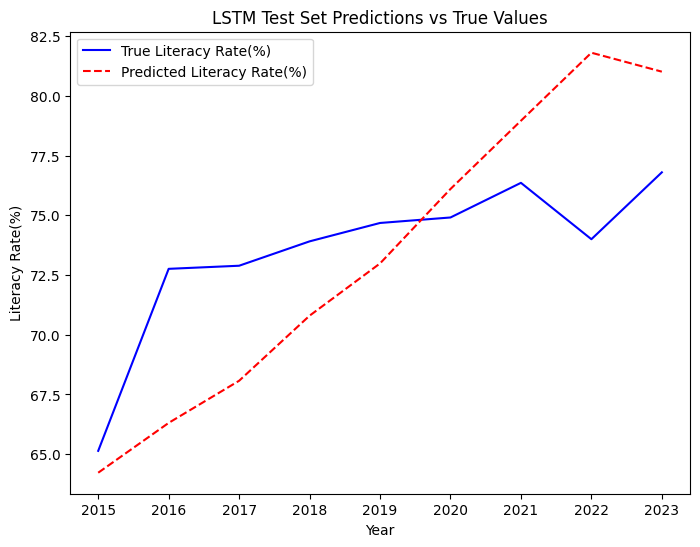

In [34]:
# Predict on test and training data
y_pred_test = y_scaler.inverse_transform(model.predict(X_test).flatten().reshape(-1, 1)).flatten()

y_pred_test = np.minimum(y_pred_test, 100)+1


# Performance metrics for test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f"Training Duration: {duration:.18f} seconds")

# Plot predictions vs true values for the test set
plt.figure(figsize=(8, 6))
plt.plot(df['Year'][split_index:], y_test, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Predicted Literacy Rate(%)', color='red', linestyle='--')
plt.title('LSTM Test Set Predictions vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()